In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import fakeenvironment_mini as fe

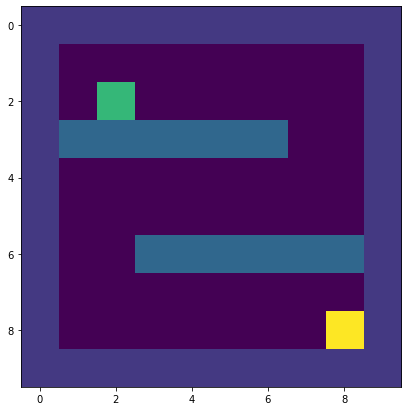

In [53]:
importlib.reload(fe)
env = fe.Environment()
env.add_obstacle((3,4,1,7))
env.add_obstacle((6,7,3,9))
# e.add_obstacle((30,40,0,35))
# e.add_obstacle((30,50,40,46))
env.plot()

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(20, input_dim=6, activation='relu'))  # TODO: Use input as 2d array.
model.add(Dense(20, activation='relu'))  # TODO: Use input as 2d array.
model.add(Dense(4))
model.compile(SGD(lr=0.004), 'mse')

In [55]:
epsilon = 0.1  # probability to choose random action instead of best action
gamma = 0.95
batch_size = 150
memory_size = 1000
max_num_steps = 100

In [59]:
memory = []
memory_lens = []
history = []
loss = []
total_rewards = []

In [60]:
verbose = False

num_epochs = 50
for epoch, epsilon, memory_size in zip(range(num_epochs), np.linspace(1., 0.05, num_epochs), np.linspace(5000, 1000, num_epochs)):    
    print("============= EPOCH ==============")
    state = env.reset()
    done = False
    loss_epoch = []
    rewards_epoch = []
    time = 0
    
    while not done and time < max_num_steps:
        time += 1
        
        if np.random.rand() <= epsilon:
            action = env.random_action()
        else:
            Q = model.predict(state.reshape(1, -1))
            action = np.argmax(Q)

        new_state, reward, done, info = env.step(action)
            
        memory.append([state, action, reward, new_state, done])
        while len(memory) > memory_size:  # only keep the most recent experiences in memory
            del memory[0]
        
        # Replay memories and train network.
        actual_batch_size = min(batch_size, len(memory))
        inputs = np.zeros((actual_batch_size, 6))
        targets = np.zeros((actual_batch_size, 4))
 
        # TODO: Maybe train multiple batches at once.
        for i, j in enumerate(np.random.choice(len(memory), size=actual_batch_size, replace=False)):
            s, a, r, new_s, d = memory[j]
            inputs[i] = s.flatten()
            Q = model.predict(s.reshape(1, -1))[0]
            targets[i] = Q
            if done:
                targets[i, a] = r
            else:
                Q_new = model.predict(new_s.reshape(1, -1))[0]
                targets[i, a] = r + gamma * np.max(Q_new)

        loss_ = model.train_on_batch(inputs, targets)
        loss_epoch.append(loss_)
        rewards_epoch.append(reward)
        
        state = new_state    
        
    loss.append(np.mean(loss_epoch))
    total_rewards.append(np.sum(rewards_epoch))
    memory_lens.append(len(memory))

============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH ==============
============= EPOCH 

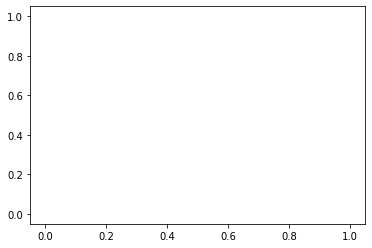

In [62]:
plt.plot(loss)

In [37]:
env.step()

(array([2., 3., 5., 0., 2., 1.]), 7.189750324093346, False, {})

In [33]:
s

(22, [6.0, 0.0, 1.0, 1.0])

In [305]:
pos = []
rewards = []
for i in range(5000):
    a = env.random_action(no_crash=True)
    s, r, done, info = env.step(a, target_gap=0)
    pos.append(env.pos)
    rewards.append(r)
    if done:
        print("solution found with iterations:", i)
        break

solution found with iterations: 393


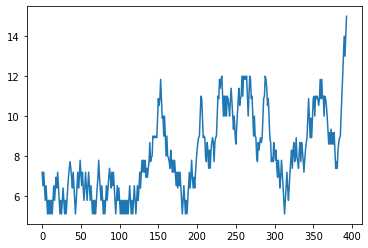

In [306]:
plt.plot(rewards)

<Figure size 720x720 with 0 Axes>

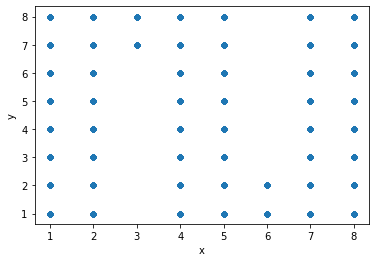

In [78]:
df = pd.DataFrame(pos)
df = df.reset_index(drop=False)
df.columns = ['index', 'x', 'y']

plt.figure(figsize=(10,10))
df.plot.scatter(x='x', y='y', alpha=0.5)

# for i, txt in enumerate(df.index):
#     ax.annotate(txt, (df.x.iat[i],df.y.iat[i]))
plt.show()